# Gradient Descent

Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model. Parameters refer to coefficients in Linear Regression and weights in neural networks.

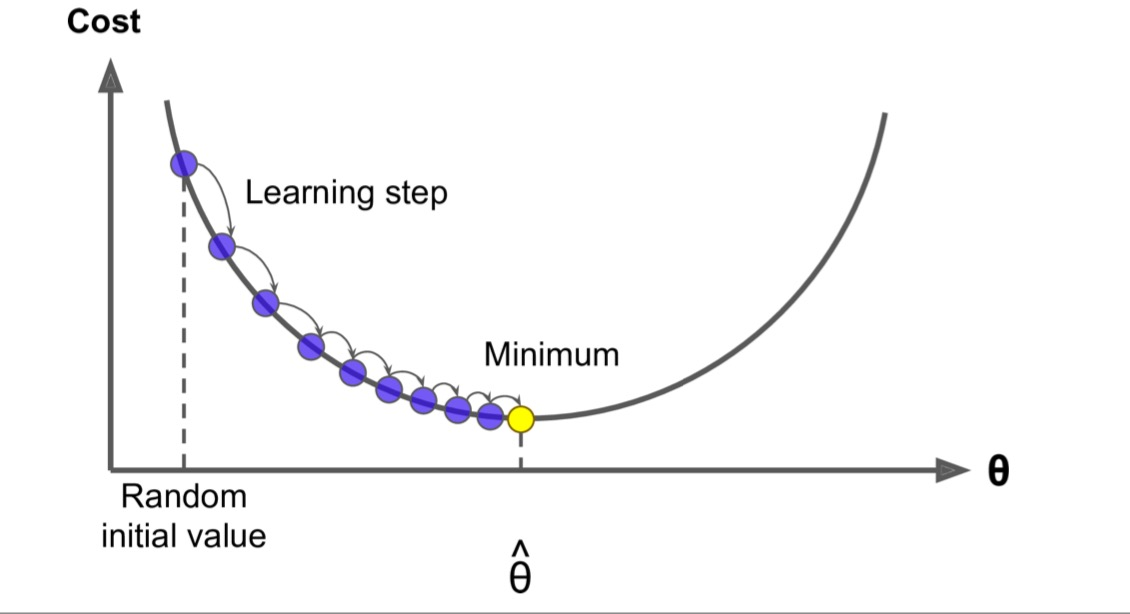

you start by filling θ with random values (this is called random initialization), and then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum:

    you need to compute the gradient of the cost function with regards to each model parameter θj.

    Partial derivative the function:

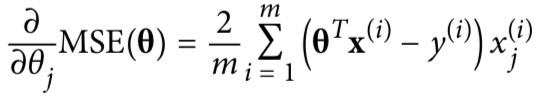

    The gradient vector: 
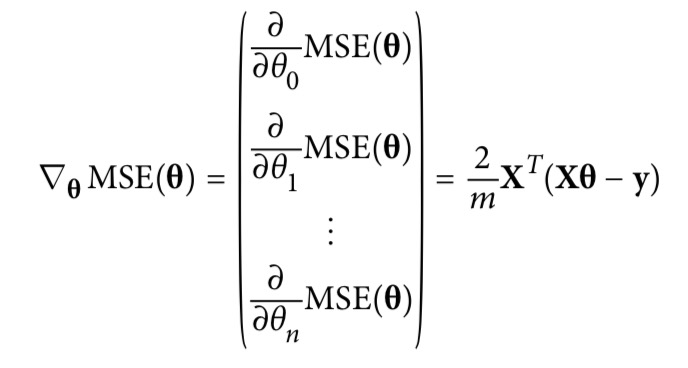


#### The influence of learning rate hyperparameter:

An important parameter in Gradient Descent is the size of the steps, determined by the learning rate hyperparameter.
If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time:
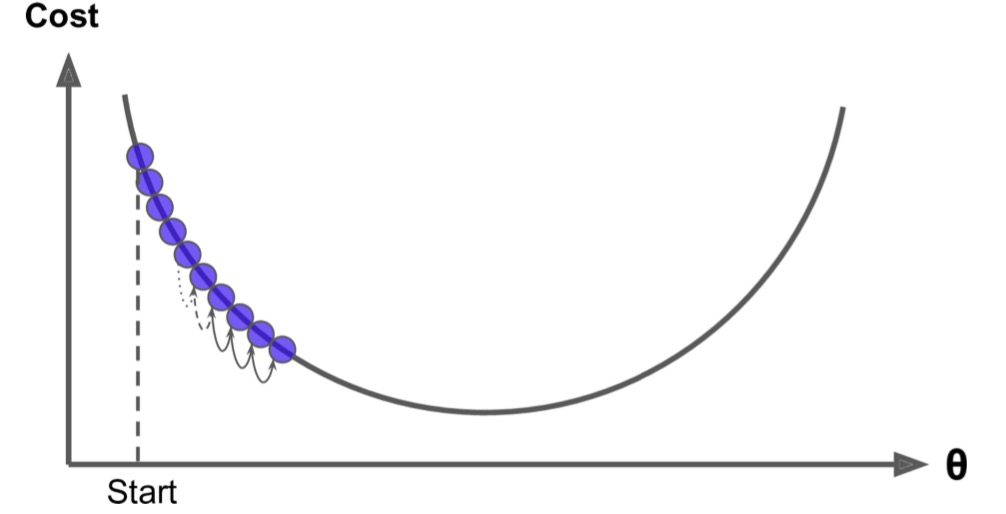

if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. 
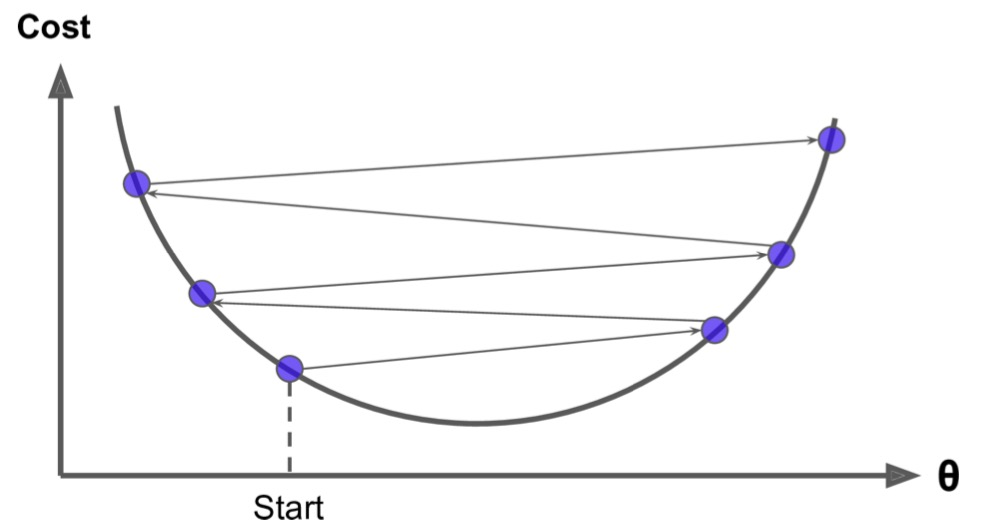

#### Classification:

##### 1. Batch Gradient Descent

The whole batch of training data at every step:

    Batch Gradient Descent is great for convex or relatively smooth error manifolds. In this case, we move somewhat directly towards an optimum solution.
    
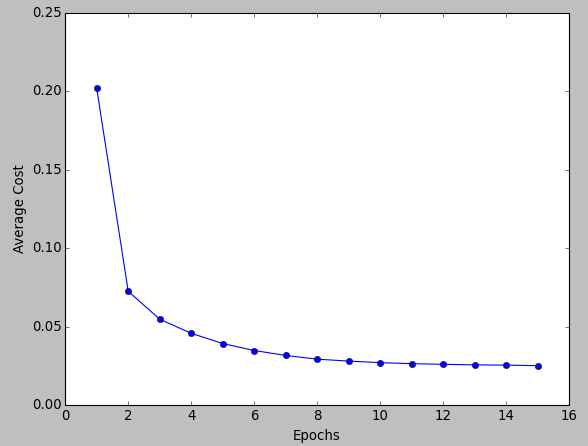 


##### 2. Stochastic Gradient Descent

Stochastic Gradient Descent just picks a random instance in the training set at every step and computes the gradients based only on that single instance.

    Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations.

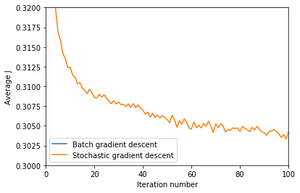

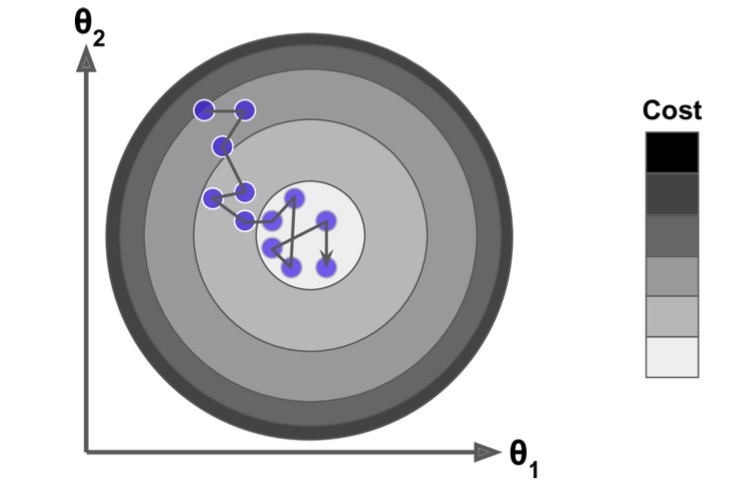

# 3. Mini-batch Gradient Descent
Mini- batch GD computes the gradients on small random sets of instances:
    Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. 


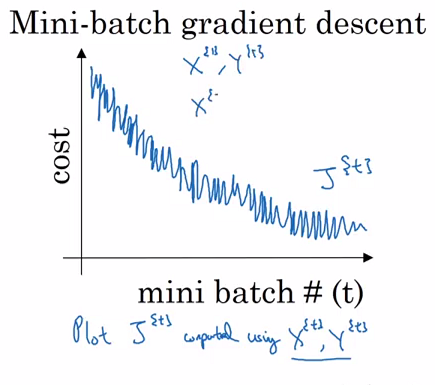



### Coding Part

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
plot_x = np.linspace(-1,6,140)
plot_y = (plot_x-2.5)**2-1

2.499891109642585
-0.99999998814289


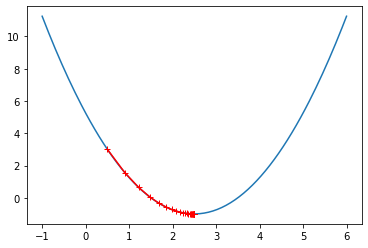

In [72]:
#getting currrent f(x)
def dJ(theta):
    return 2*(theta-2.5)
 
#sett my f(x)
def J(theta):
    return (theta-2.5)**2-1
 
#theta=0
#eta = 0.1
eta = 0.1
theta_history = []
theta = 0
epsilon = 1e-8
while True:
    gredient = dJ(theta)
    last_theta = theta
    theta = theta - eta*gredient
    theta_history.append(theta)
    
    if(abs(J(theta) - J(last_theta)) < epsilon):
        break
        
print(theta)
print(J(theta))
 
plt.plot(plot_x, J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color='r',marker='+')
plt.show()

Batch Gradient Descent

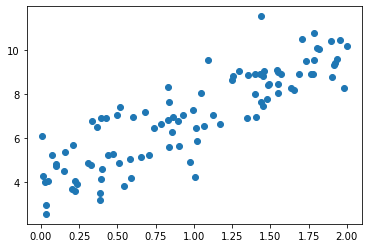

In [74]:
import numpy as np
import matplotlib.pyplot as plt

#setting the value
np.random.seed(666)
x = 2 * np.random.random(size=100)
y = x*3. + 4. + np.random.normal(size=100)

#vector
X = x.reshape(-1,1)

#vistualizing 
plt.scatter(x,y)
plt.show()

In [75]:
def J(theta , X_b , y):
    try:
        return sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')
#combining into a set ——res
def dJ(theta, X_b ,y):
    res = np.empty(len(theta))
    res[0] = np.sum(X_b.dot(theta) - y)
    for i in range(1, len(theta)):
        res[i] = (X_b.dot(theta) - y).dot(X_b[:,i])
    return res * 2 / len(X_b)

#return X_b.T.dot(X_b.dot(theta)-y)*2. / len(y)

In [52]:
def gradient_descent(X_b, y ,inital_theta, eta ,n_inters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    i_inter = 0
    
    while i_inter < n_inters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta*gradient
    
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        
        i_inter += 1
    return theta

In [53]:
X_b = np.hstack([np.ones((len(x),1)), x.reshape(-1,1)])
#inital theta=0
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01 #learning rate 
 
theta = gradient_descent(X_b, y, initial_theta, eta)
theta

array([4.02145786, 3.00706277])

Stochastic Gradient Descent

In [56]:
import numpy as np
import matplotlib.pyplot as plt
 
m = 100000

#setting the value
x = np.random.normal(size = m)
X = x.reshape(-1,1)
y = 4. * x + 3. +np.random.normal(0,3,size = m) #f(x)
 
def J(theta , X_b , y):
    try:
        return sum((y-X_b.dot(theta))**2)/len(X_b)
    except:
        return float('inf')
    
def dJ(theta, X_b ,y):
    return X_b.T.dot(X_b.dot(theta)-y)*2. / len(y) 
 
def gradient_descent(X_b, y ,inital_theta, eta ,n_inters = 1e4, epsilon = 1e-8):
    theta = initial_theta
    i_inter = 0
    
    while i_inter < n_inters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta*gradient
    
        if(abs(J(theta,X_b,y) - J(last_theta,X_b,y)) < epsilon):
            break
        
        i_inter += 1
    return theta

In [57]:
%%time
X_b = np.hstack([np.ones((len(x),1)), X])
initial_theta = np.zeros(X_b.shape[1])
eta = 0.01
 
theta = gradient_descent(X_b, y, initial_theta, eta)
theta

CPU times: user 19.5 s, sys: 141 ms, total: 19.6 s
Wall time: 10.4 s


array([2.99684688, 3.98193909])

In [61]:
#gradient
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i)* 2. 
  
#pattern: t0/(t+t1)
#to be random
def sgd(X_b, y, initial_theta, n_iters):
    
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0/(t+t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        #taking sample
        rand_i = np.random.randint(len(X_b))
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
        
    return theta

In [66]:
%%time
X_b = np.hstack([np.ones((len(x),1)), X])
initial_theta = np.zeros(X_b.shape[1])
theta = sgd(X_b, y, initial_theta, n_iters=len(X_b)//3)
theta

CPU times: user 12.5 s, sys: 112 ms, total: 12.6 s
Wall time: 12.8 s


array([3.02067909, 3.98398357])

mini gradient descent

In [63]:
#gradient 
def dJ_sgd(theta, X_b_i, y_i):
    return X_b_i.T.dot(X_b_i.dot(theta) - y_i)* 2. 
 
 
def sgd(X_b, y, initial_theta, n_iters,n=100):
    
    t0 = 5
    t1 = 50
    
    def learning_rate(t):
        return t0/(t+t1)
    
    theta = initial_theta
    for cur_iter in range(n_iters):
        # my sample
        for i in range(n):
            rand_i = []
            rand_i_1 = np.random.randint(len(X_b))
            rand_i.append(rand_i_1)
            
        gradient = dJ_sgd(theta, X_b[rand_i], y[rand_i])
        theta = theta - learning_rate(cur_iter) * gradient
    return theta

In [67]:
%%time
import numpy as np
X_b = np.hstack([np.ones((len(x),1)), X])
initial_theta = np.zeros(X_b.shape[1])
 
theta = sgd(X_b, y, initial_theta,n=5, n_iters=len(X_b)//3)
theta

CPU times: user 1.05 s, sys: 9.46 ms, total: 1.05 s
Wall time: 1.07 s


array([2.98430101, 3.95284425])

In [ ]:
Stochastic Gradient Descent

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('gd.csv')

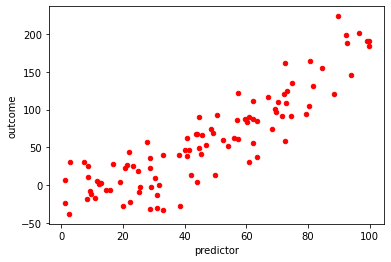

In [35]:
fig,axes = plt.subplots()
data.plot(kind='scatter',x='predictor',y='outcome',ax=axes,marker='o',color='r')
axes.set(xlabel='predictor',ylabel='outcome')
fig.savefig('p1.png')

In [36]:
data.insert(0,'Ones',1)
data.head()

,Ones,predictor,outcome
0,1,33.030315,39.763458
1,1,45.336084,41.113417
2,1,24.763619,18.217457
3,1,70.287326,110.008171
4,1,19.201285,3.987237


In [40]:
#setting values
def get_fea_lab(data):
    cols = data.shape[1]
    X = data.iloc[:,0:cols-1] # taking values
    y = data.iloc[:,cols-1:cols] # taking value 
 
    # to be gradient
    X = np.matrix(X.values)
    y = np.matrix(y.values)
    return X,y
 
# f(x)
def computeCost(data,theta,i):
    X,y = get_fea_lab(data)
    inner = np.power(((X*theta.T)-y),2)
    return (float(inner[i]/2))
 
# random descending f(x)
def stochastic_gradient_descent(data,theta,alpha,epoch):
    
    X0,y0 = get_fea_lab(data)  # taking x and y
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.shape[1])
    cost = np.zeros(len(X0))
    avg_cost = np.zeros(epoch)
    
    for k in range(epoch):
        new_data = data.sample(frac=1) # mess up the data
        X,y = get_fea_lab(new_data)  # take new x and y gradient  
        for i in range(len(X)):
            error = X[i:i+1]*theta.T-y[i]
            cost[i] = computeCost(new_data,theta,i)
            for j in range(parameters):
                temp[0,j] = theta[0,j] - alpha*error*X[i:i+1,j]

            theta = temp
        avg_cost[k] = np.average(cost)
        
    return theta,avg_cost
 
# setting value
alpha = 0.001 #learning rate
epoch = 40 # epoch
theta = np.matrix(np.array([0,0])) #theta
 
g,avg_cost = stochastic_gradient_descent(data,theta,alpha,epoch)

<ipython-input-40-7edce3e71a9b>:15: RuntimeWarning: overflow encountered in power
  inner = np.power(((X*theta.T)-y),2)
<ipython-input-40-7edce3e71a9b>:34: RuntimeWarning: invalid value encountered in subtract
  temp[0,j] = theta[0,j] - alpha*error*X[i:i+1,j]


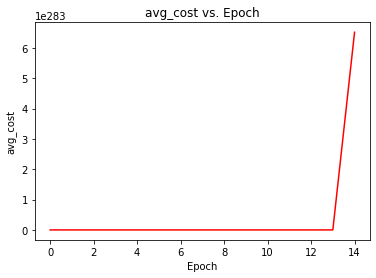

In [38]:
fig, axes = plt.subplots()
axes.plot(np.arange(epoch), avg_cost, 'r')
axes.set_xlabel('Epoch')
axes.set_ylabel('avg_cost')
axes.set_title('avg_cost vs. Epoch')
fig.savefig('p2.png')